In [1]:
import sys

import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import random

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 
h
θ
(
x
)
 の出力が推定結果です。

## 【問題4】平均二乗誤差¶
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

In [2]:
def MSE(y_pred, y, m):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    mse = 1 / ( m) * (np.dot((y_pred - y).T, (y_pred-y)))
    
    return mse

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） 
J
(
θ
)
 は次の式です。

In [194]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    

    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _gradient_descent(self, X, y, theta):
        """
        最適なパラメータ(theta)を算出する関数
        
        Enter
        --  --  --  --  --  --
        X:ndarray.shape(n_samples, n_features)
        y:ndarray.shape(n_samples, )
        theta:ndarray.shape(X.shape[1])
        ------------------
        
        Return
        -- --  --  --  --  -- 
        theta:ndarray.shape(X.shape[1])
        -------------------
        
        最急降下法を用いてEnterのthetaより、モデルにフィットしたthetaを返す
        
        
        """
        m = len(X)
        
                      # (1 x サンプル数)　@ (サンプル数 x 特徴量数)　= (1 x 特徴量数)
        gradient = np.dot((self._linear_hypothesis(X, theta) - y), X)
        theta_out = theta - self.lr * 1 / m * gradient
        
        return theta_out
    
    
    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        学習データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
             #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
        y_hut = np.dot(X ,  theta)
        
        return y_hut
    
    
    def MSE_loss(self, y_pred, y, m):
        """
        平均二乗誤差の計算
        
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
        y : 次の形のndarray, shape (n_samples,)
        正解値
        
        Returns
        ----------
        mse : numpy.float
        平均二乗誤差
        """
        #(1 x サンプル数) @ (サンプル数 x 1) = 値
        mse_loss = 1 / ( 2* m) * (np.dot((y_pred - y).T, (y_pred-y)))
        
        return mse_loss

    def fit(self, X, y , X_val=np.array([]),  y_val=np.array([])):
        
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
            
            ---------------------
            データ量の数値が大きすぎるとエラーが返ってくるので、標準化を推奨
        """
        
        if self.bias:
            self.theta = np.random.rand(X.shape[1])
          
        else:
            X = np.insert(X, 0, 1, axis=1)  
            self.theta = np.random.rand(X.shape[1])
            
            
        m = len(X)
        
        
        for i in range(self.iter):
            self.theta = self._gradient_descent(X, y, self.theta)
            y_pred = self._linear_hypothesis(X, self.theta)
            self.loss[i] = self.MSE_loss(y_pred, y, m)
            
            
            
        if X_val.size != 0:
            if self.bias:
                self.theta_val = np.random.rand(X_val.shape[1])
            
            else:
                X_val = np.insert(X_val, 0, 1, axis=1)  
                self.theta_val = np.random.rand(X_val.shape[1])
            
            m_val = len(X_val)
            
            for i in range(self.iter):
                self.theta_val = self._gradient_descent(X_val, y_val,self.theta_val)
                y_pred_val = self._linear_hypothesis(X_val, self.theta_val)
                self.val_loss[i] = self.MSE_loss(y_pred_val, y_val, m_val)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            
            print("train data:", self.loss)
            print("validation data:", self.val_loss)


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.bias == False:
            X = np.insert(X, 0, 1, axis=1)
        
        result_y = self._linear_hypothesis(X, self.theta)
        
        return result_y

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [26]:
data_raw = pd.read_csv("/Users/morishuuya/Desktop/dataset/kaggle/HousePrice/train.csv")

In [27]:
data = data_raw.copy(deep=True)

In [28]:
Target = data["SalePrice"]
X_house = data.loc[:, ["GrLivArea", "YearBuilt"]]

In [29]:
X_train, X_test, y_train,y_test = train_test_split(X_house, Target, test_size=0.25)

In [30]:
X_train = X_train.values
y_train =y_train.values

X_test = X_test.values
y_test = y_test.values

In [31]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
y_train_std =  (y_train - y_train.mean()) / y_train.std()

X_test_std = (X_test - X_test.mean()) / X_train.std()
y_test_std =  (y_test - y_test.mean()) / y_train.std()

In [32]:
lr = LinearRegression()
lr.fit(X_train_std, y_train_std)

y_lr_pred = lr.predict(X_test)
print("切片:", lr.intercept_)
print("パラメータ:", lr.coef_)

切片: -2.6568505099044604
パラメータ: [0.54431233 5.51023956]


In [185]:
slr  = ScratchLinearRegression(bias=False, num_iter=1000, lr=0.001)
slr.fit(X_train_std, y_train_std, X_val=X_test_std,  y_val=y_test_std)

y_slr_pred= slr.predict(X_test_std)
print("切片:", slr.theta[0])
print("パラメータ:", slr.theta[1:])

切片: 0.5057264580527281
パラメータ: [ 0.56919791 -0.09361187]


In [186]:
slr.loss[-1]

0.25351982598588946

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

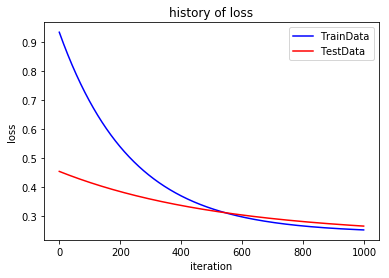

In [187]:
plt.plot(slr.loss, color="blue", label="TrainData")
plt.plot(slr.val_loss, color="red", label="TestData")
plt.title("history of loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()

plt.show()

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [188]:
slr2  = ScratchLinearRegression(bias=True, num_iter=1000, lr=0.001)

In [189]:
slr2.fit(X_train_std, y_train_std, X_val=X_test_std,  y_val=y_test_std)

In [190]:
y_slr2_pred= slr2.predict(X_test_std)

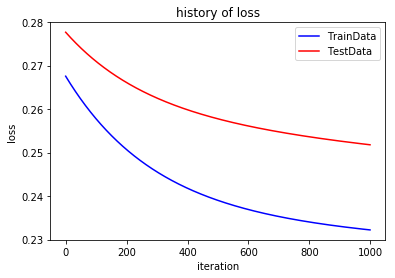

In [191]:
plt.plot(slr2.loss, color="blue", label="TrainData")
plt.plot(slr2.val_loss, color="red", label="TestData")
plt.title("history of loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()

plt.show()

In [192]:
slr2.loss[-1]

0.23221133944879752

In [193]:
print("バイアスありの損失:", slr.loss[-1].round(4))
print("バイアスなしの損失:", slr2.loss[-1].round(4))

バイアスありの損失: 0.2535
バイアスなしの損失: 0.2322


バイアス項を抜くと損失が少し減少した